In [68]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [69]:
access_pr_file = "pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc"

In [70]:
import calendar

In [ ]:
from mpl_toolkits import basemap

In [116]:
def calc_prate_climo(filename=access_pr_file,month_name='Jan'):
    dset = xr.open_dataset(access_pr_file)
    prate = dset.variables['pr'] * 86400
    month_map = {}
    for i in range(1,12):
        month_map[calendar.month_abbr[i]] = i
    months = dset.groupby('time.month').groups
    month_idx = months[month_map[month_name]]
    month_prates = prate[month_idx,:,:]
    mean_prate = month_prates.mean(dim='time')
    return mean_prate

In [117]:
mean_prate = calc_prate_climo(filename=access_pr_file,month_name='Jan')

In [124]:
def plot_prate_climo(mean_prate):
    bm = basemap.Basemap(llcrnrlon=0,llcrnrlat=-90, urcrnrlon=360, urcrnrlat=90)
    x,y = np.meshgrid(dset.variables['lon'][:],dset.variables['lat'][:])
    #bm.contourf(x,y,mean_prate)
    bm.imshow(mean_prate)
    bm.drawcoastlines()
    plt.colorbar()
    

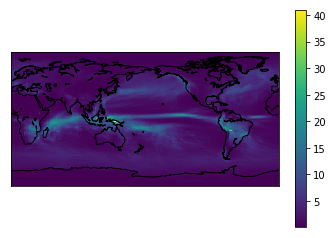

In [126]:
plot_prate_climo(mean_prate)